In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Chuẩn bị dữ liệu
data_train = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Sunny", "Rain"],
    "Temperature": ["Cool", "Cool", "Mild", "Hot", "Hot", "Hot", "Mild", "Cool", "Hot", "Cool"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "High", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Weak"],
    "PlayTennis": ["Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes"]
}

data_test = {
    "Outlook": ["Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Cool", "Hot", "Mild", "Cool"],
    "Humidity": ["Normal", "High", "Normal", "High"],
    "Wind": ["Strong", "Strong", "Weak", "Strong"],
    "PlayTennis": ["Yes", "Yes", "Yes", "No"]
}

df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

# 2. Mã hóa các biến phân loại
label_encoders = {}
for col in ["Outlook", "Temperature", "Humidity", "Wind"]:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])  # dùng transform, không fit lại
    label_encoders[col] = le

# Mã hóa nhãn PlayTennis
le_target = LabelEncoder()
y_train = le_target.fit_transform(df_train["PlayTennis"])
X_train = df_train.drop(columns=["PlayTennis"])

# 3. Xây cây quyết định sử dụng Entropy
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# 4. Lấy dòng cuối cùng trong tập kiểm tra để dự đoán
X_test_last = df_test.drop(
    columns=["PlayTennis"]).iloc[-1].values.reshape(1, -1)

# 5. Dự đoán và giải mã nhãn dự đoán
y_pred_encoded = clf.predict(X_test_last)
y_pred = le_target.inverse_transform(y_pred_encoded)

print(f"Dự đoán cho dòng cuối cùng trong tập kiểm tra: {y_pred[0]}")

Dự đoán cho dòng cuối cùng trong tập kiểm tra: No


d:\Asus\Ungdung\Miniconda\workspace\envs\AIOEx\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [4]:
new_sample_dict = {
    "Outlook": "Overcast",
    "Temperature": "Hot",   # giả định giá trị
    "Humidity": "High",     # giả định giá trị
    "Wind": "Weak"
}

# Chuyển thành DataFrame 1 dòng
new_sample_df = pd.DataFrame([new_sample_dict])

# Mã hóa các cột categorical sử dụng bộ encoder có sẵn
for col in ["Outlook", "Temperature", "Humidity", "Wind"]:
    le = label_encoders[col]
    new_sample_df[col] = le.transform(new_sample_df[col])

# Chuẩn bị input cho mô hình
X_new = new_sample_df.values

# Dự đoán
y_pred_encoded = clf.predict(X_new)
y_pred = le_target.inverse_transform(y_pred_encoded)

print(f"Dự đoán cho mẫu mới: {y_pred[0]}")

Dự đoán cho mẫu mới: Yes


d:\Asus\Ungdung\Miniconda\workspace\envs\AIOEx\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


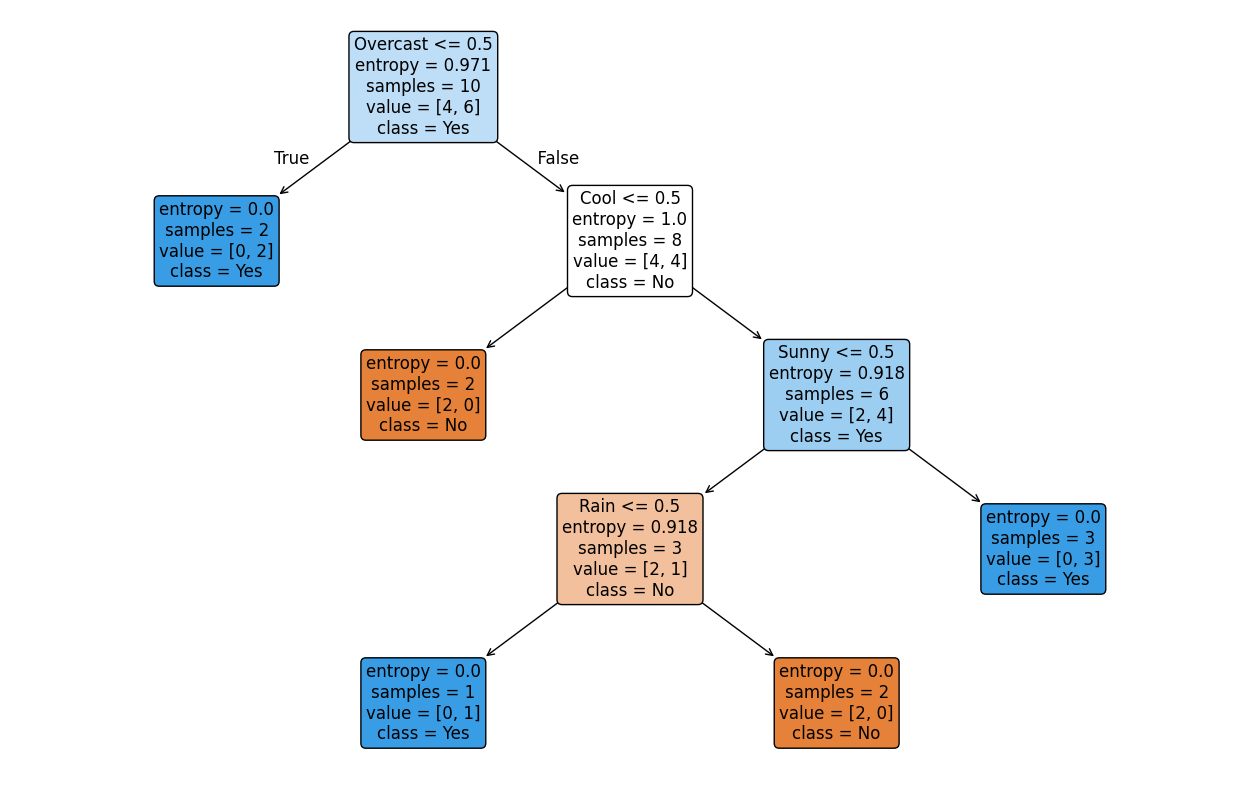

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Giả sử clf, encoder và label encoder đã có từ trước

# 1. Vẽ cây quyết định
plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=label_encoders["Outlook"].classes_.tolist() +
    label_encoders["Temperature"].classes_.tolist() +
    label_encoders["Humidity"].classes_.tolist() +
    label_encoders["Wind"].classes_.tolist(),
    class_names=le_target.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()